In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')



## Simple aggregation using the mean

In [27]:
with open(os.path.join(config_dir,'1d_polynomial_compare_learnable_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [28]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': 'BasicMLPAggregator',
   'insize': 128,
   'num_layers': 2,
   'num_neurons': 64,
   'dimout': 1}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'mu': 0,
  'sigma': 2,
  'num_instances_train': 64,
  'num_instances_vali': 1,
  'num_instances_test': 1},
 'experiment_params': {'dim_observation': 50,
  'lr': 0.001,
  'n_epochs': 10000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 1,
  'batch_size_test': 1,
  'plotting': True,
  'print_after': 100}}

In [29]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)


In [30]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         3.213
Mean Validation loss after 0 equals                     3.461

Validation loss for the function plotted:                 3.461


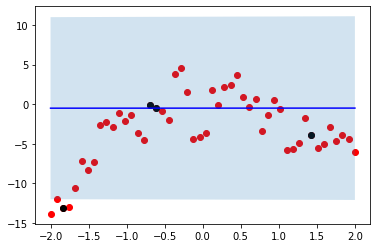

  1%|          | 98/10000 [00:02<03:26, 47.85it/s]

Mean training loss at epoch 100 :                         3.852
Mean Validation loss after 100 equals                     3.264

Validation loss for the function plotted:                 3.264


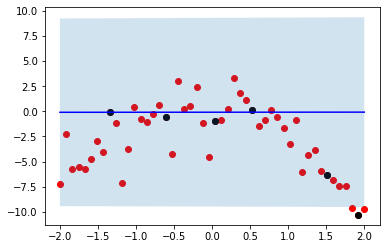

  2%|▏         | 196/10000 [00:04<02:51, 57.30it/s]

Mean training loss at epoch 200 :                         4.444
Mean Validation loss after 200 equals                     3.525

Validation loss for the function plotted:                 3.525


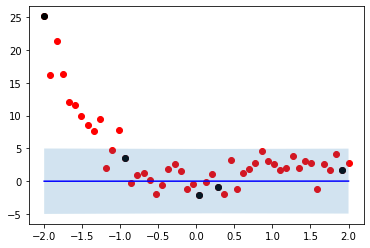

  3%|▎         | 300/10000 [00:06<03:01, 53.35it/s]

Mean training loss at epoch 300 :                         3.382
Mean Validation loss after 300 equals                     3.737

Validation loss for the function plotted:                 3.737


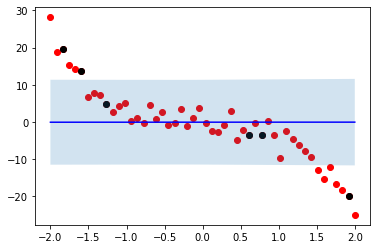

  4%|▍         | 396/10000 [00:09<03:16, 48.96it/s]

Mean training loss at epoch 400 :                         3.355
Mean Validation loss after 400 equals                     2.562

Validation loss for the function plotted:                 2.562


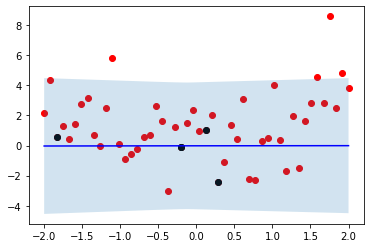

  5%|▌         | 500/10000 [00:11<03:00, 52.54it/s]

Mean training loss at epoch 500 :                         3.093
Mean Validation loss after 500 equals                     3.172

Validation loss for the function plotted:                 3.172


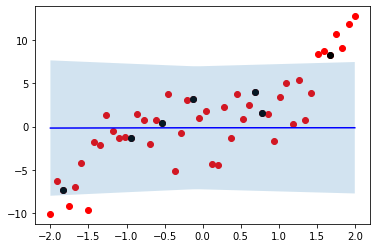

  6%|▌         | 600/10000 [00:13<02:55, 53.64it/s]

Mean training loss at epoch 600 :                         3.914
Mean Validation loss after 600 equals                     3.779

Validation loss for the function plotted:                 3.779


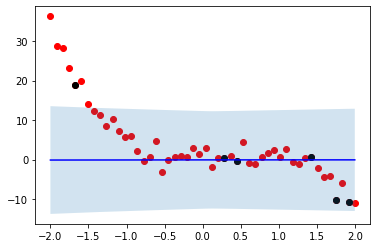

  7%|▋         | 698/10000 [00:15<02:33, 60.62it/s]

Mean training loss at epoch 700 :                         2.649
Mean Validation loss after 700 equals                     3.67

Validation loss for the function plotted:                 3.67


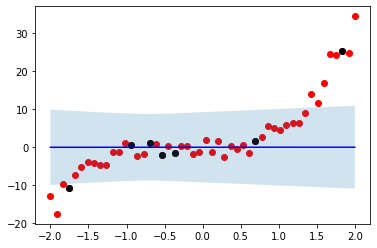

  8%|▊         | 795/10000 [00:17<02:27, 62.31it/s]

Mean training loss at epoch 800 :                         2.652
Mean Validation loss after 800 equals                     3.05

Validation loss for the function plotted:                 3.05


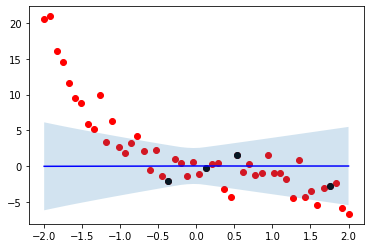

  9%|▉         | 900/10000 [00:19<02:49, 53.71it/s]

Mean training loss at epoch 900 :                         2.652
Mean Validation loss after 900 equals                     2.886

Validation loss for the function plotted:                 2.886


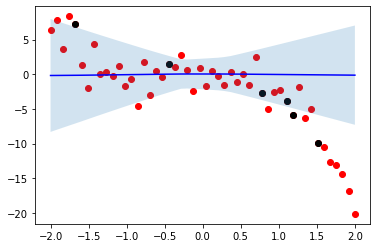

 10%|▉         | 995/10000 [00:21<02:34, 58.17it/s]

Mean training loss at epoch 1000 :                         2.798
Mean Validation loss after 1000 equals                     2.702

Validation loss for the function plotted:                 2.702


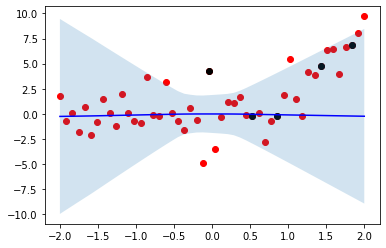

 11%|█         | 1098/10000 [00:23<03:32, 41.90it/s]

Mean training loss at epoch 1100 :                         2.885
Mean Validation loss after 1100 equals                     2.629

Validation loss for the function plotted:                 2.629


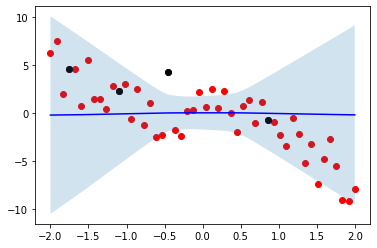

 12%|█▏        | 1198/10000 [00:26<02:56, 49.98it/s]

Mean training loss at epoch 1200 :                         2.723
Mean Validation loss after 1200 equals                     2.691

Validation loss for the function plotted:                 2.691


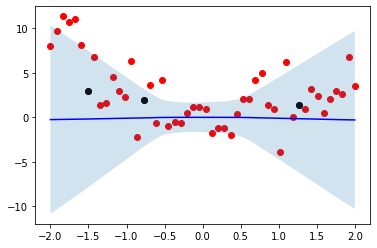

 13%|█▎        | 1296/10000 [00:27<02:26, 59.32it/s]

Mean training loss at epoch 1300 :                         2.788
Mean Validation loss after 1300 equals                     2.532

Validation loss for the function plotted:                 2.532


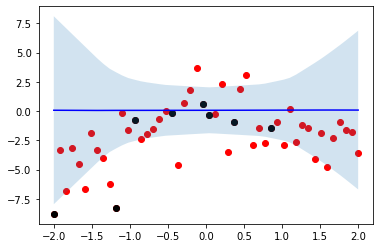

 14%|█▍        | 1396/10000 [00:29<02:27, 58.43it/s]

Mean training loss at epoch 1400 :                         2.893
Mean Validation loss after 1400 equals                     2.575

Validation loss for the function plotted:                 2.575


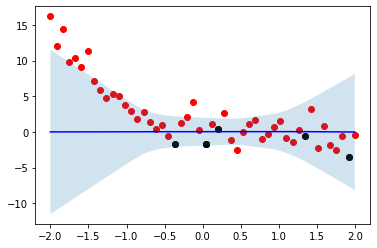

 15%|█▍        | 1496/10000 [00:32<02:33, 55.37it/s]

Mean training loss at epoch 1500 :                         2.809
Mean Validation loss after 1500 equals                     2.627

Validation loss for the function plotted:                 2.627


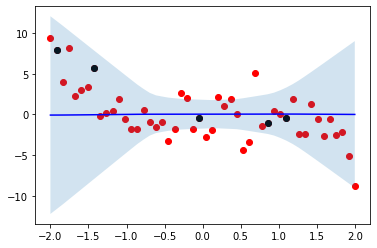

 16%|█▌        | 1596/10000 [00:34<02:31, 55.36it/s]

Mean training loss at epoch 1600 :                         2.447
Mean Validation loss after 1600 equals                     2.642

Validation loss for the function plotted:                 2.642


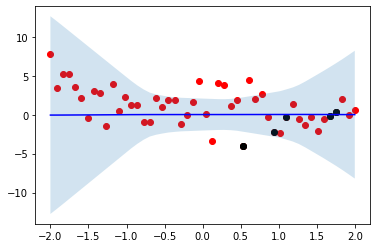

 17%|█▋        | 1695/10000 [00:35<02:20, 59.28it/s]

Mean training loss at epoch 1700 :                         2.81
Mean Validation loss after 1700 equals                     2.587

Validation loss for the function plotted:                 2.587


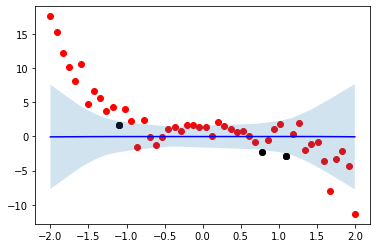

 18%|█▊        | 1798/10000 [00:37<02:07, 64.16it/s]

Mean training loss at epoch 1800 :                         2.694
Mean Validation loss after 1800 equals                     2.731

Validation loss for the function plotted:                 2.731


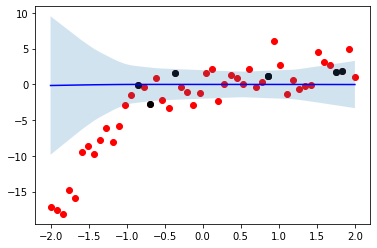

 19%|█▉        | 1894/10000 [00:39<02:13, 60.51it/s]

Mean training loss at epoch 1900 :                         2.688
Mean Validation loss after 1900 equals                     2.785

Validation loss for the function plotted:                 2.785


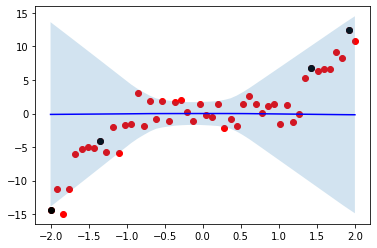

 20%|█▉        | 1994/10000 [00:41<02:13, 59.84it/s]

Mean training loss at epoch 2000 :                         2.595
Mean Validation loss after 2000 equals                     2.758

Validation loss for the function plotted:                 2.758


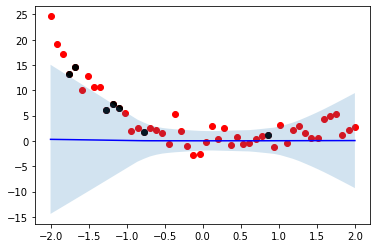

 21%|██        | 2095/10000 [00:43<02:24, 54.84it/s]

Mean training loss at epoch 2100 :                         2.576
Mean Validation loss after 2100 equals                     2.558

Validation loss for the function plotted:                 2.558


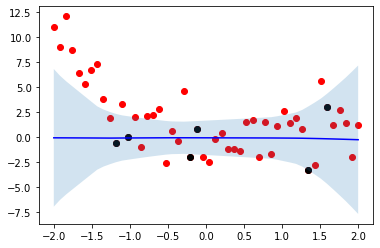

 22%|██▏       | 2197/10000 [00:45<04:17, 30.28it/s]

Mean training loss at epoch 2200 :                         2.821
Mean Validation loss after 2200 equals                     2.397

Validation loss for the function plotted:                 2.397


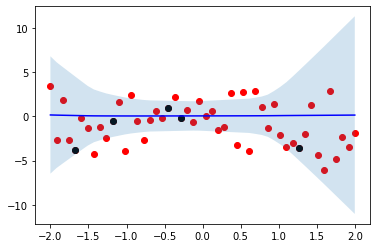

 23%|██▎       | 2299/10000 [00:48<02:30, 51.16it/s]

Mean training loss at epoch 2300 :                         2.466
Mean Validation loss after 2300 equals                     2.556

Validation loss for the function plotted:                 2.556


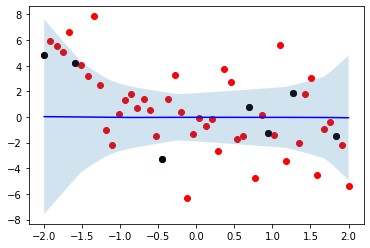

 24%|██▍       | 2395/10000 [00:50<02:26, 51.98it/s]

Mean training loss at epoch 2400 :                         2.643
Mean Validation loss after 2400 equals                     2.79

Validation loss for the function plotted:                 2.79


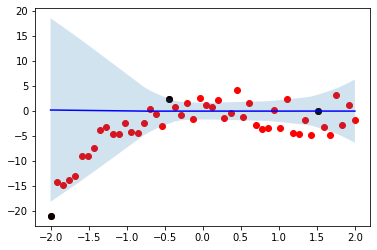

 25%|██▍       | 2497/10000 [00:52<02:06, 59.09it/s]

Mean training loss at epoch 2500 :                         2.765
Mean Validation loss after 2500 equals                     2.832

Validation loss for the function plotted:                 2.832


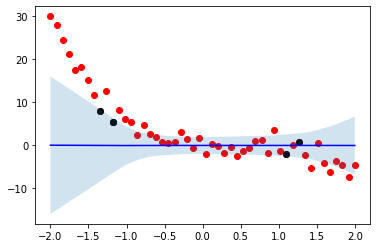

 26%|██▌       | 2596/10000 [00:54<02:25, 50.85it/s]

Mean training loss at epoch 2600 :                         2.546
Mean Validation loss after 2600 equals                     2.622

Validation loss for the function plotted:                 2.622


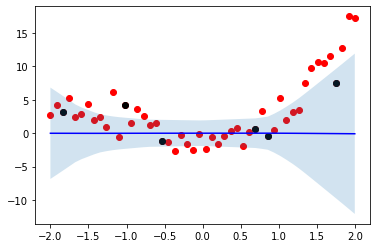

 27%|██▋       | 2697/10000 [00:56<02:21, 51.65it/s]

Mean training loss at epoch 2700 :                         2.821
Mean Validation loss after 2700 equals                     2.718

Validation loss for the function plotted:                 2.718


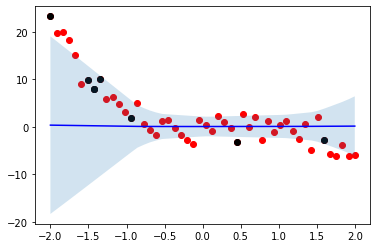

 28%|██▊       | 2799/10000 [00:58<02:11, 54.96it/s]

Mean training loss at epoch 2800 :                         2.388
Mean Validation loss after 2800 equals                     3.031

Validation loss for the function plotted:                 3.031


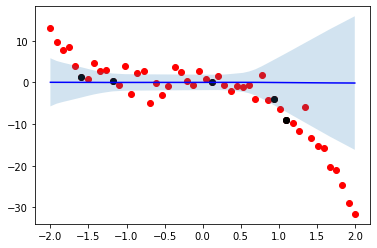

 29%|██▉       | 2896/10000 [01:00<02:42, 43.66it/s]

Mean training loss at epoch 2900 :                         2.571
Mean Validation loss after 2900 equals                     2.411

Validation loss for the function plotted:                 2.411


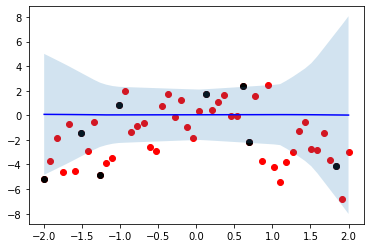

 30%|██▉       | 2999/10000 [01:03<02:33, 45.47it/s]

Mean training loss at epoch 3000 :                         3.03
Mean Validation loss after 3000 equals                     2.842

Validation loss for the function plotted:                 2.842


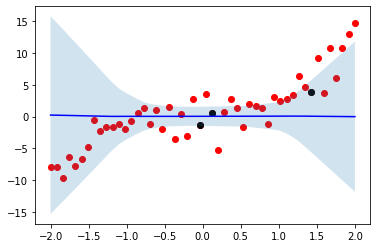

 31%|███       | 3096/10000 [01:05<02:36, 44.23it/s]

Mean training loss at epoch 3100 :                         2.719
Mean Validation loss after 3100 equals                     2.708

Validation loss for the function plotted:                 2.708


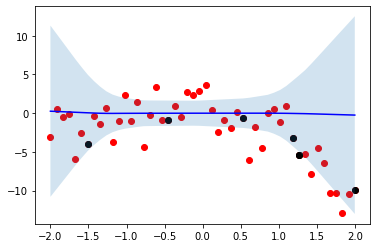

 32%|███▏      | 3199/10000 [01:07<01:57, 57.74it/s]

Mean training loss at epoch 3200 :                         2.897
Mean Validation loss after 3200 equals                     2.655

Validation loss for the function plotted:                 2.655


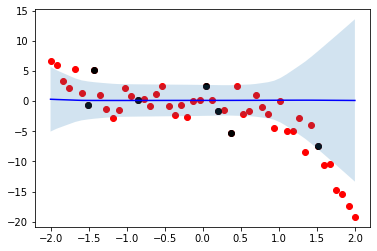

 33%|███▎      | 3296/10000 [01:09<01:58, 56.43it/s]

Mean training loss at epoch 3300 :                         2.518
Mean Validation loss after 3300 equals                     2.825

Validation loss for the function plotted:                 2.825


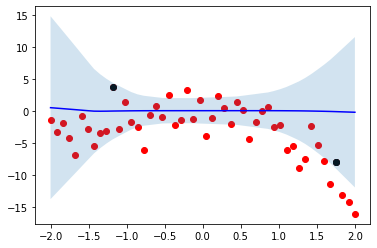

 34%|███▍      | 3400/10000 [01:12<01:56, 56.66it/s]

Mean training loss at epoch 3400 :                         2.426
Mean Validation loss after 3400 equals                     2.811

Validation loss for the function plotted:                 2.811


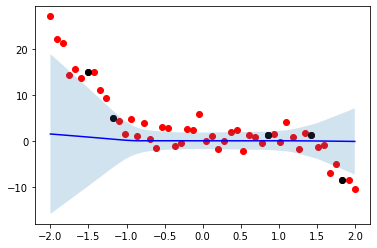

 35%|███▍      | 3499/10000 [01:14<02:05, 51.95it/s]

Mean training loss at epoch 3500 :                         2.712
Mean Validation loss after 3500 equals                     2.496

Validation loss for the function plotted:                 2.496


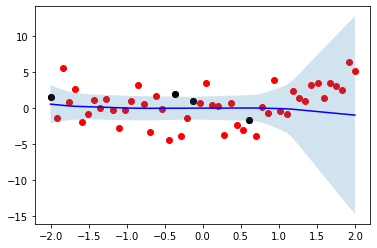

 36%|███▌      | 3600/10000 [01:16<02:08, 49.69it/s]

Mean training loss at epoch 3600 :                         2.615
Mean Validation loss after 3600 equals                     2.85

Validation loss for the function plotted:                 2.85


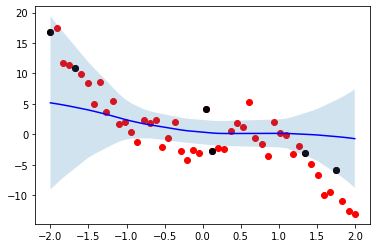

 37%|███▋      | 3697/10000 [01:18<01:48, 58.24it/s]

Mean training loss at epoch 3700 :                         2.314
Mean Validation loss after 3700 equals                     2.39

Validation loss for the function plotted:                 2.39


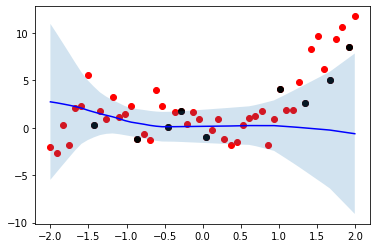

 38%|███▊      | 3798/10000 [01:20<01:44, 59.45it/s]

Mean training loss at epoch 3800 :                         2.233
Mean Validation loss after 3800 equals                     2.724

Validation loss for the function plotted:                 2.724


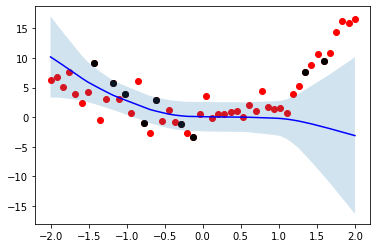

 39%|███▉      | 3896/10000 [01:21<01:41, 59.97it/s]

Mean training loss at epoch 3900 :                         2.881
Mean Validation loss after 3900 equals                     3.575

Validation loss for the function plotted:                 3.575


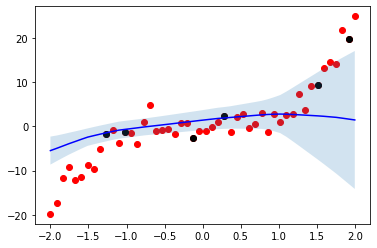

 40%|███▉      | 3999/10000 [01:23<01:41, 59.37it/s]

Mean training loss at epoch 4000 :                         2.141
Mean Validation loss after 4000 equals                     2.796

Validation loss for the function plotted:                 2.796


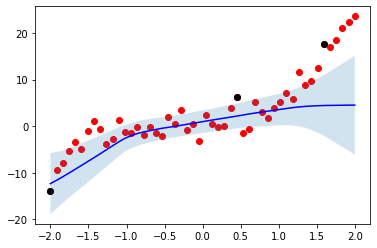

 41%|████      | 4098/10000 [01:25<01:44, 56.33it/s]

Mean training loss at epoch 4100 :                         2.608
Mean Validation loss after 4100 equals                     2.304

Validation loss for the function plotted:                 2.304


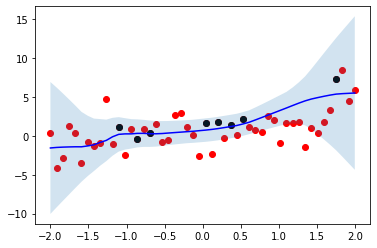

 42%|████▏     | 4200/10000 [01:27<01:35, 60.44it/s]

Mean training loss at epoch 4200 :                         2.393
Mean Validation loss after 4200 equals                     2.46

Validation loss for the function plotted:                 2.46


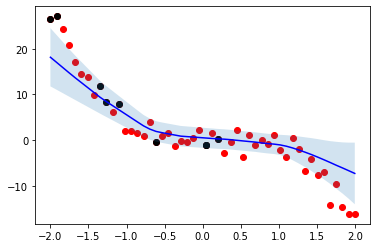

 43%|████▎     | 4299/10000 [01:30<02:37, 36.21it/s]

Mean training loss at epoch 4300 :                         2.34
Mean Validation loss after 4300 equals                     2.371

Validation loss for the function plotted:                 2.371


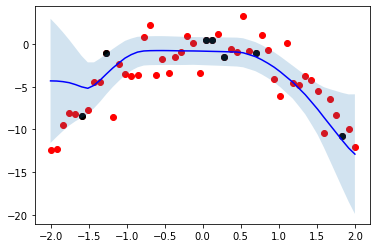

 44%|████▍     | 4399/10000 [01:32<01:46, 52.73it/s]

Mean training loss at epoch 4400 :                         2.402
Mean Validation loss after 4400 equals                     2.382

Validation loss for the function plotted:                 2.382


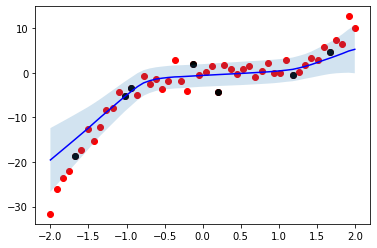

 45%|████▍     | 4494/10000 [01:34<01:40, 54.73it/s]

Mean training loss at epoch 4500 :                         2.384
Mean Validation loss after 4500 equals                     2.395

Validation loss for the function plotted:                 2.395


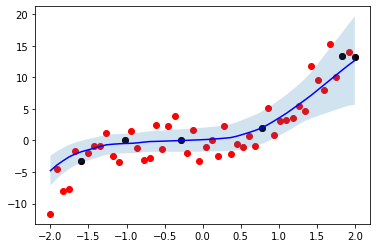

 46%|████▌     | 4595/10000 [01:36<01:40, 53.89it/s]

Mean training loss at epoch 4600 :                         2.194
Mean Validation loss after 4600 equals                     2.437

Validation loss for the function plotted:                 2.437


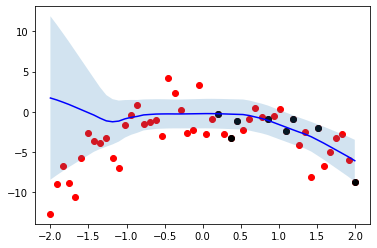

 47%|████▋     | 4697/10000 [01:38<01:30, 58.74it/s]

Mean training loss at epoch 4700 :                         2.332
Mean Validation loss after 4700 equals                     2.455

Validation loss for the function plotted:                 2.455


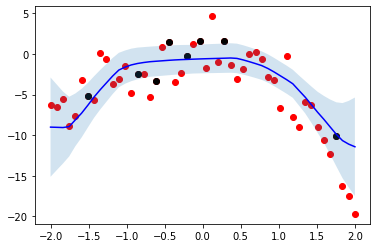

 48%|████▊     | 4796/10000 [01:40<01:43, 50.41it/s]

Mean training loss at epoch 4800 :                         2.409
Mean Validation loss after 4800 equals                     2.247

Validation loss for the function plotted:                 2.247


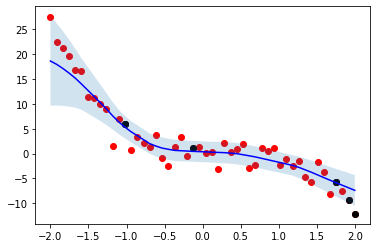

 49%|████▉     | 4900/10000 [01:42<01:32, 54.85it/s]

Mean training loss at epoch 4900 :                         2.421
Mean Validation loss after 4900 equals                     2.301

Validation loss for the function plotted:                 2.301


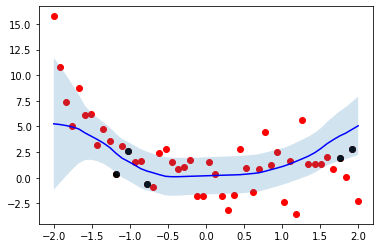

 50%|████▉     | 4998/10000 [01:44<01:30, 55.38it/s]

Mean training loss at epoch 5000 :                         2.239
Mean Validation loss after 5000 equals                     2.589

Validation loss for the function plotted:                 2.589


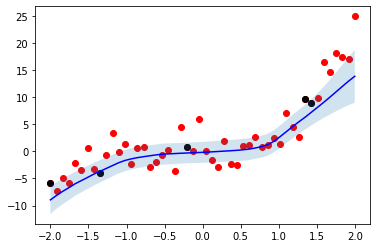

 51%|█████     | 5096/10000 [01:46<01:32, 52.86it/s]

Mean training loss at epoch 5100 :                         2.297
Mean Validation loss after 5100 equals                     2.263

Validation loss for the function plotted:                 2.263


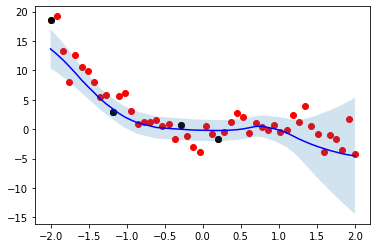

 52%|█████▏    | 5199/10000 [01:48<01:28, 54.23it/s]

Mean training loss at epoch 5200 :                         2.516
Mean Validation loss after 5200 equals                     2.101

Validation loss for the function plotted:                 2.101


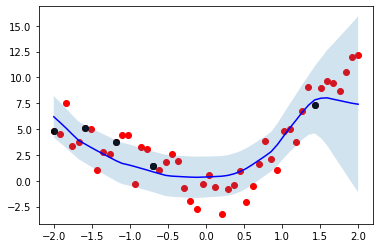

 53%|█████▎    | 5299/10000 [01:50<01:18, 60.07it/s]

Mean training loss at epoch 5300 :                         2.219
Mean Validation loss after 5300 equals                     2.299

Validation loss for the function plotted:                 2.299


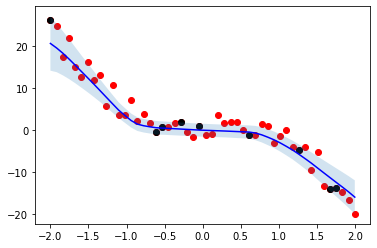

 54%|█████▍    | 5394/10000 [01:52<01:26, 53.36it/s]

Mean training loss at epoch 5400 :                         2.133
Mean Validation loss after 5400 equals                     2.112

Validation loss for the function plotted:                 2.112


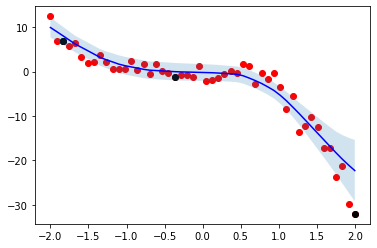

 55%|█████▍    | 5495/10000 [01:54<01:19, 56.43it/s]

Mean training loss at epoch 5500 :                         2.175
Mean Validation loss after 5500 equals                     2.45

Validation loss for the function plotted:                 2.45


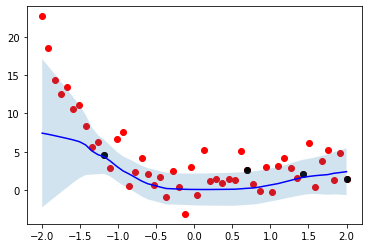

 56%|█████▌    | 5598/10000 [01:56<01:27, 50.07it/s]

Mean training loss at epoch 5600 :                         2.141
Mean Validation loss after 5600 equals                     2.174

Validation loss for the function plotted:                 2.174


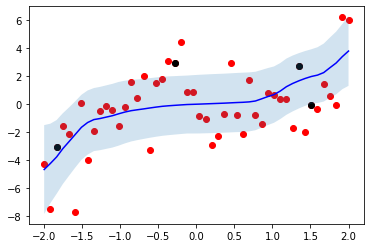

 57%|█████▋    | 5695/10000 [01:58<01:13, 58.55it/s]

Mean training loss at epoch 5700 :                         2.111
Mean Validation loss after 5700 equals                     2.419

Validation loss for the function plotted:                 2.419


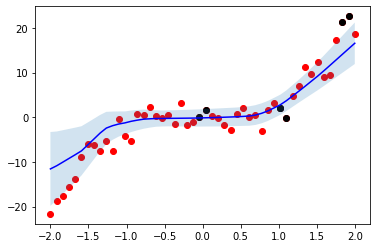

 58%|█████▊    | 5794/10000 [02:00<01:14, 56.64it/s]

Mean training loss at epoch 5800 :                         2.16
Mean Validation loss after 5800 equals                     2.339

Validation loss for the function plotted:                 2.339


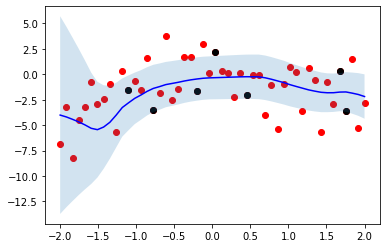

 59%|█████▉    | 5895/10000 [02:02<01:17, 53.10it/s]

Mean training loss at epoch 5900 :                         2.431
Mean Validation loss after 5900 equals                     2.248

Validation loss for the function plotted:                 2.248


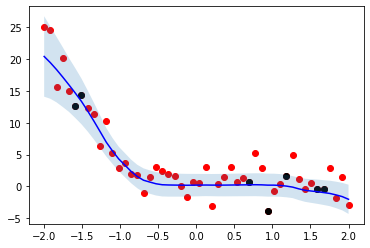

 60%|█████▉    | 5995/10000 [02:04<01:10, 56.75it/s]

Mean training loss at epoch 6000 :                         2.065
Mean Validation loss after 6000 equals                     2.334

Validation loss for the function plotted:                 2.334


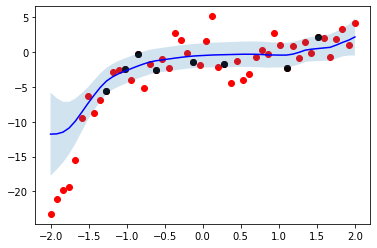

 61%|██████    | 6098/10000 [02:06<01:23, 46.50it/s]

Mean training loss at epoch 6100 :                         2.029
Mean Validation loss after 6100 equals                     2.49

Validation loss for the function plotted:                 2.49


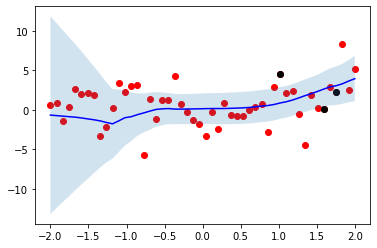

 62%|██████▏   | 6194/10000 [02:08<01:05, 57.77it/s]

Mean training loss at epoch 6200 :                         2.126
Mean Validation loss after 6200 equals                     2.189

Validation loss for the function plotted:                 2.189


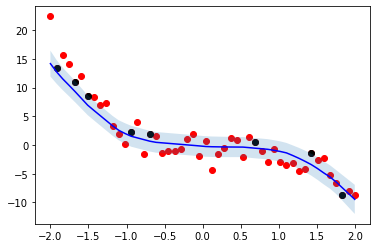

 63%|██████▎   | 6295/10000 [02:10<01:04, 57.57it/s]

Mean training loss at epoch 6300 :                         2.078
Mean Validation loss after 6300 equals                     2.367

Validation loss for the function plotted:                 2.367


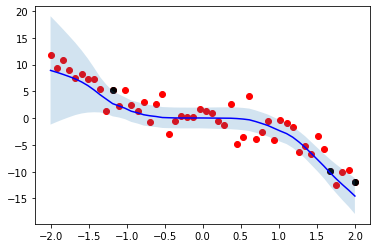

 64%|██████▍   | 6396/10000 [02:12<01:11, 50.53it/s]

Mean training loss at epoch 6400 :                         2.2
Mean Validation loss after 6400 equals                     2.661

Validation loss for the function plotted:                 2.661


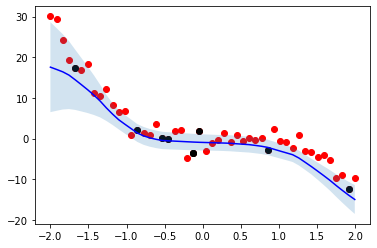

 65%|██████▌   | 6500/10000 [02:15<01:55, 30.38it/s]

Mean training loss at epoch 6500 :                         2.048
Mean Validation loss after 6500 equals                     2.196

Validation loss for the function plotted:                 2.196


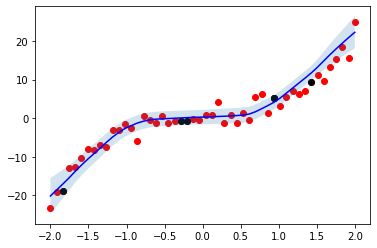

 66%|██████▌   | 6599/10000 [02:17<01:04, 52.73it/s]

Mean training loss at epoch 6600 :                         2.187
Mean Validation loss after 6600 equals                     2.213

Validation loss for the function plotted:                 2.213


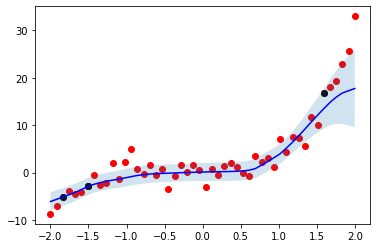

 67%|██████▋   | 6700/10000 [02:19<00:56, 58.62it/s]

Mean training loss at epoch 6700 :                         2.128
Mean Validation loss after 6700 equals                     2.627

Validation loss for the function plotted:                 2.627


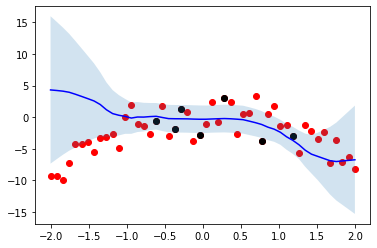

 68%|██████▊   | 6800/10000 [02:21<00:52, 60.40it/s]

Mean training loss at epoch 6800 :                         2.753
Mean Validation loss after 6800 equals                     3.184

Validation loss for the function plotted:                 3.184


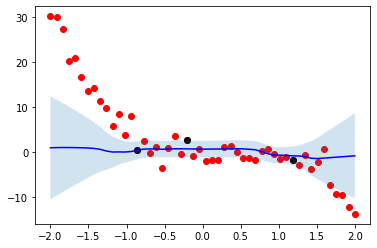

 69%|██████▉   | 6896/10000 [02:22<00:53, 58.25it/s]

Mean training loss at epoch 6900 :                         2.183
Mean Validation loss after 6900 equals                     2.233

Validation loss for the function plotted:                 2.233


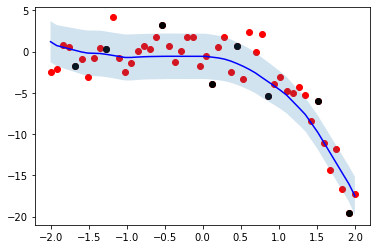

 70%|██████▉   | 6998/10000 [02:25<01:35, 31.40it/s]

Mean training loss at epoch 7000 :                         2.142
Mean Validation loss after 7000 equals                     2.027

Validation loss for the function plotted:                 2.027


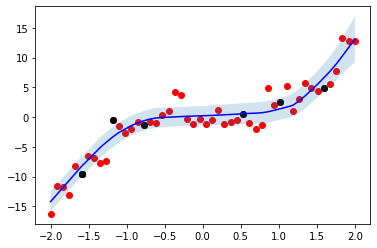

 71%|███████   | 7096/10000 [02:28<01:30, 32.06it/s]

Mean training loss at epoch 7100 :                         2.548
Mean Validation loss after 7100 equals                     2.706

Validation loss for the function plotted:                 2.706


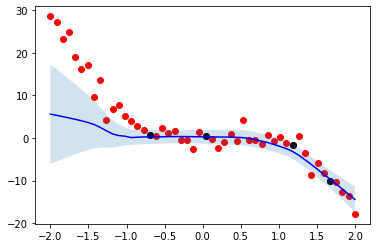

 72%|███████▏  | 7195/10000 [02:31<00:53, 52.15it/s]

Mean training loss at epoch 7200 :                         2.114
Mean Validation loss after 7200 equals                     2.435

Validation loss for the function plotted:                 2.435


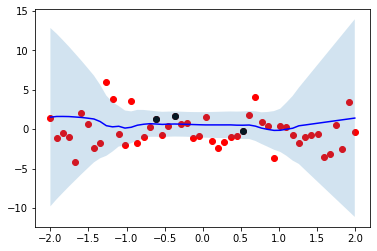

 73%|███████▎  | 7299/10000 [02:33<00:53, 50.83it/s]

Mean training loss at epoch 7300 :                         2.13
Mean Validation loss after 7300 equals                     2.534

Validation loss for the function plotted:                 2.534


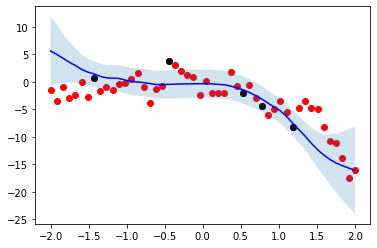

 74%|███████▍  | 7400/10000 [02:35<00:45, 56.94it/s]

Mean training loss at epoch 7400 :                         2.139
Mean Validation loss after 7400 equals                     2.176

Validation loss for the function plotted:                 2.176


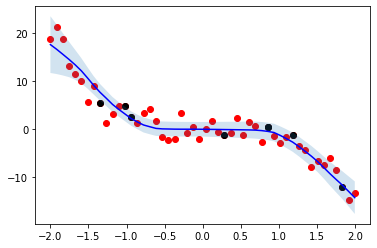

 75%|███████▍  | 7496/10000 [02:37<00:55, 44.99it/s]

Mean training loss at epoch 7500 :                         2.203
Mean Validation loss after 7500 equals                     2.431

Validation loss for the function plotted:                 2.431


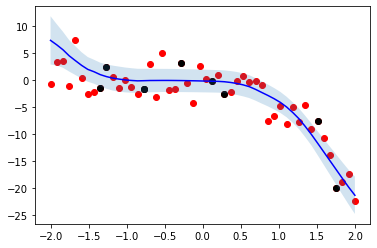

 76%|███████▌  | 7598/10000 [02:40<01:24, 28.58it/s]

Mean training loss at epoch 7600 :                         2.342
Mean Validation loss after 7600 equals                     2.081

Validation loss for the function plotted:                 2.081


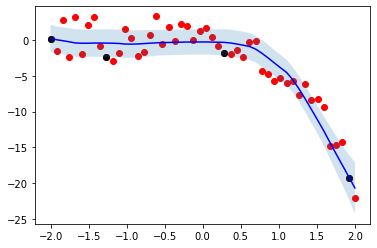

 77%|███████▋  | 7699/10000 [02:43<01:01, 37.59it/s]

Mean training loss at epoch 7700 :                         2.085
Mean Validation loss after 7700 equals                     2.291

Validation loss for the function plotted:                 2.291


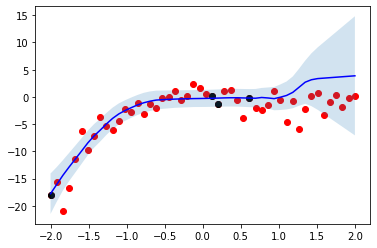

 78%|███████▊  | 7797/10000 [02:46<00:56, 38.83it/s]

Mean training loss at epoch 7800 :                         2.096
Mean Validation loss after 7800 equals                     2.148

Validation loss for the function plotted:                 2.148


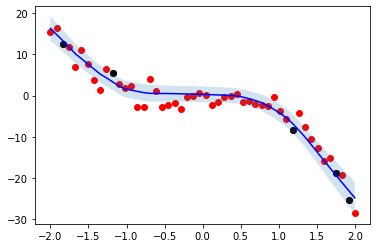

 79%|███████▉  | 7899/10000 [02:48<00:43, 47.92it/s]

Mean training loss at epoch 7900 :                         2.104
Mean Validation loss after 7900 equals                     2.377

Validation loss for the function plotted:                 2.377


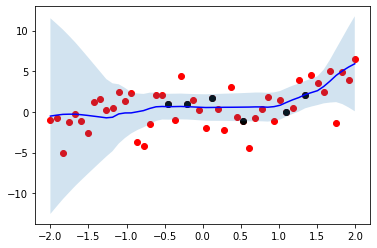

 80%|███████▉  | 7996/10000 [02:51<00:47, 42.61it/s]

Mean training loss at epoch 8000 :                         2.247
Mean Validation loss after 8000 equals                     3.023

Validation loss for the function plotted:                 3.023


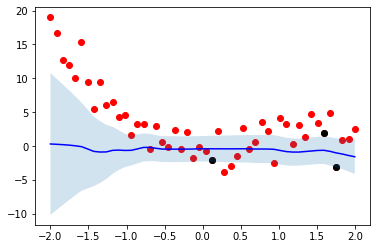

 81%|████████  | 8099/10000 [02:53<00:39, 48.43it/s]

Mean training loss at epoch 8100 :                         2.075
Mean Validation loss after 8100 equals                     2.538

Validation loss for the function plotted:                 2.538


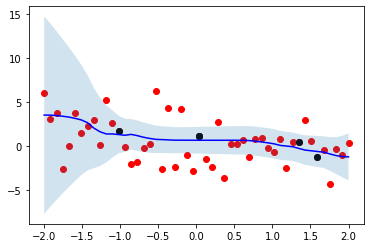

 82%|████████▏ | 8200/10000 [02:58<00:39, 45.54it/s]

Mean training loss at epoch 8200 :                         2.213
Mean Validation loss after 8200 equals                     2.404

Validation loss for the function plotted:                 2.404


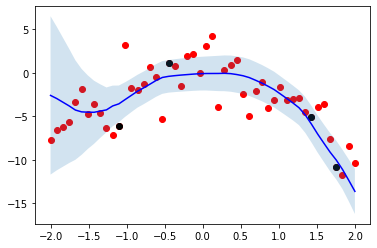

 83%|████████▎ | 8300/10000 [03:00<00:29, 56.69it/s]

Mean training loss at epoch 8300 :                         2.068
Mean Validation loss after 8300 equals                     2.669

Validation loss for the function plotted:                 2.669


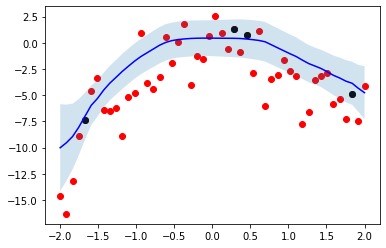

 84%|████████▍ | 8398/10000 [03:02<00:38, 41.74it/s]

Mean training loss at epoch 8400 :                         1.936
Mean Validation loss after 8400 equals                     2.382

Validation loss for the function plotted:                 2.382


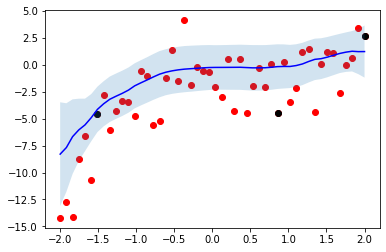

 85%|████████▍ | 8498/10000 [03:06<00:54, 27.63it/s]

Mean training loss at epoch 8500 :                         2.226
Mean Validation loss after 8500 equals                     2.656

Validation loss for the function plotted:                 2.656


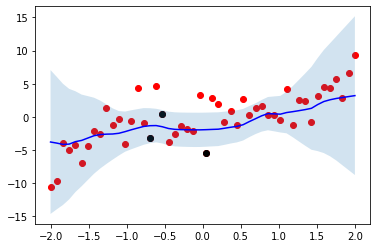

 86%|████████▌ | 8600/10000 [03:09<00:24, 56.86it/s]

Mean training loss at epoch 8600 :                         2.31
Mean Validation loss after 8600 equals                     2.17

Validation loss for the function plotted:                 2.17


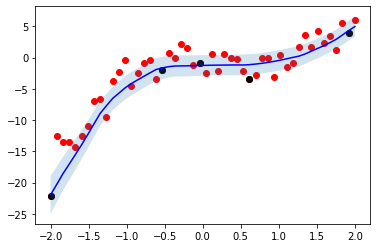

 87%|████████▋ | 8697/10000 [03:11<00:25, 51.87it/s]

Mean training loss at epoch 8700 :                         2.112
Mean Validation loss after 8700 equals                     2.39

Validation loss for the function plotted:                 2.39


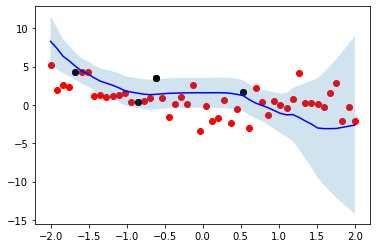

 88%|████████▊ | 8799/10000 [03:14<00:24, 48.33it/s]

Mean training loss at epoch 8800 :                         2.198
Mean Validation loss after 8800 equals                     2.692

Validation loss for the function plotted:                 2.692


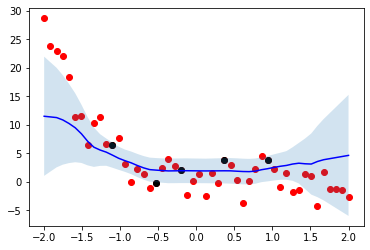

 89%|████████▉ | 8899/10000 [03:16<00:18, 60.80it/s]

Mean training loss at epoch 8900 :                         2.304
Mean Validation loss after 8900 equals                     2.838

Validation loss for the function plotted:                 2.838


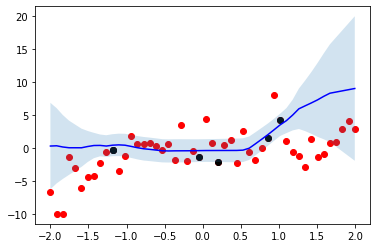

 90%|█████████ | 9000/10000 [03:18<00:16, 60.54it/s]

Mean training loss at epoch 9000 :                         2.236
Mean Validation loss after 9000 equals                     2.983

Validation loss for the function plotted:                 2.983


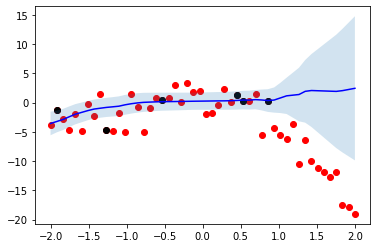

 91%|█████████ | 9100/10000 [03:20<00:17, 51.64it/s]

Mean training loss at epoch 9100 :                         2.094
Mean Validation loss after 9100 equals                     2.586

Validation loss for the function plotted:                 2.586


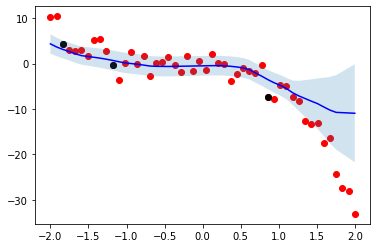

 92%|█████████▏| 9196/10000 [03:22<00:18, 44.38it/s]

Mean training loss at epoch 9200 :                         2.11
Mean Validation loss after 9200 equals                     2.741

Validation loss for the function plotted:                 2.741


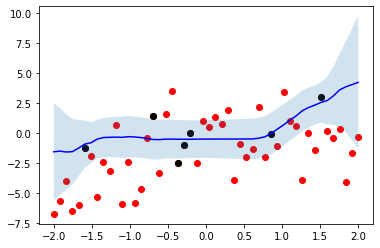

 93%|█████████▎| 9295/10000 [03:24<00:14, 50.32it/s]

Mean training loss at epoch 9300 :                         2.314
Mean Validation loss after 9300 equals                     2.403

Validation loss for the function plotted:                 2.403


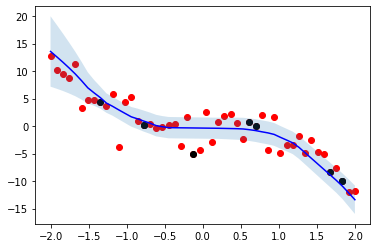

 94%|█████████▍| 9396/10000 [03:26<00:11, 53.85it/s]

Mean training loss at epoch 9400 :                         2.374
Mean Validation loss after 9400 equals                     2.719

Validation loss for the function plotted:                 2.719


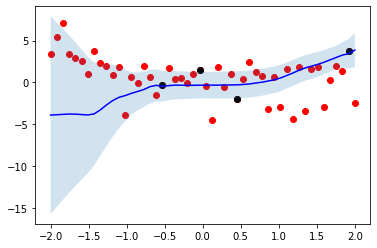

 95%|█████████▍| 9496/10000 [03:28<00:08, 58.31it/s]

Mean training loss at epoch 9500 :                         2.21
Mean Validation loss after 9500 equals                     2.284

Validation loss for the function plotted:                 2.284


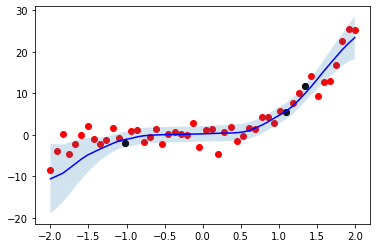

 96%|█████████▌| 9597/10000 [03:30<00:06, 59.32it/s]

Mean training loss at epoch 9600 :                         1.999
Mean Validation loss after 9600 equals                     2.372

Validation loss for the function plotted:                 2.372


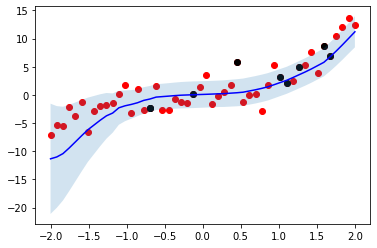

 97%|█████████▋| 9696/10000 [03:32<00:05, 58.67it/s]

Mean training loss at epoch 9700 :                         1.986
Mean Validation loss after 9700 equals                     2.43

Validation loss for the function plotted:                 2.43


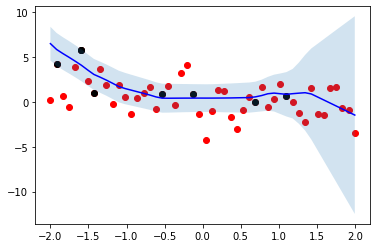

 98%|█████████▊| 9799/10000 [03:34<00:03, 55.96it/s]

Mean training loss at epoch 9800 :                         2.406
Mean Validation loss after 9800 equals                     2.533

Validation loss for the function plotted:                 2.533


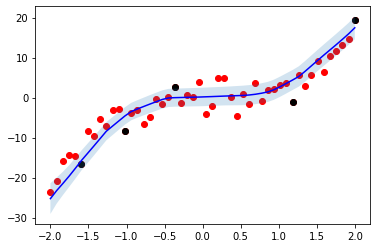

 99%|█████████▉| 9894/10000 [03:36<00:01, 59.85it/s]

Mean training loss at epoch 9900 :                         2.229
Mean Validation loss after 9900 equals                     2.262

Validation loss for the function plotted:                 2.262


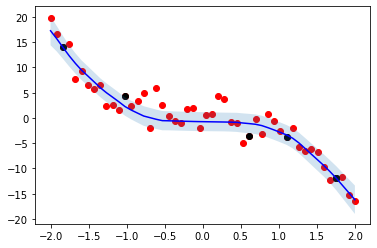

100%|██████████| 10000/10000 [03:38<00:00, 45.79it/s]


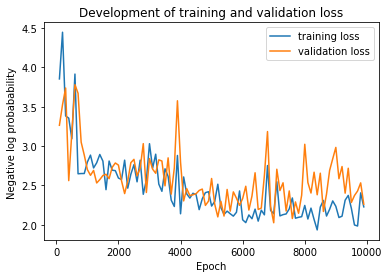

In [32]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

In [46]:
np.random.seed(0)
np.random.randint(5, 10)

9

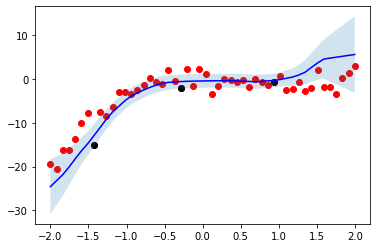

10.86737060546875


In [40]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [41]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_lernable_weighted_average', to_save)